For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [14]:
loans = pd.read_csv('loan_data.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [16]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [17]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


<Axes: xlabel='fico', ylabel='Count'>

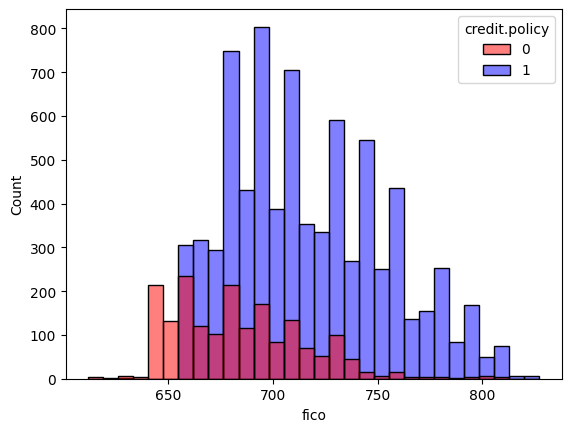

In [19]:
sns.histplot(data=loans, x='fico', bins=30, hue='credit.policy',
             palette=['red','blue'], alpha=0.5)


### 📊 Chart Interpretation

This chart is a histogram that plots the distribution of FICO credit scores for two different groups, stacked on top of each other:

* **Blue (Credit.Policy=1):** This group represents individuals who **meet** the bank's or lender's credit policy. We can think of them as "low-risk" or "approved" customers.
* **Red (Credit.Policy=0):** This group represents individuals who do **not meet** the credit policy. We can think of them as "high-risk" or "denied" customers.

The x-axis shows the FICO score, and the y-axis shows the number of people (count) in each group with that score.

---

### Key Takeaways

1.  **FICO Score is a Major Factor in the Credit Policy**
    The most obvious insight is that the FICO score is *highly* correlated with the credit policy decision. The two groups have very different distributions:
    * The **"Policy=0" (Red) group** is heavily concentrated at **lower FICO scores**, primarily between 600 and 700, peaking around 650.
    * The **"Policy=1" (Blue) group** is concentrated at **higher FICO scores**, mostly from 680 to 800+, with large peaks around 700 and 740.

2.  **There Appears to Be a "High-Risk" Threshold**
    Below a FICO score of approximately **660**, almost *all* individuals fall into the "Policy=0" (Red) group. This strongly suggests the lender considers scores in this range to be high-risk and automatically disqualifies them from meeting the policy.

3.  **Most People in the Dataset Meet the Credit Policy**
    The total area of the blue histogram is significantly larger than the red one. This indicates that a large majority of the individuals in this dataset were classified as meeting the credit criteria (Credit.Policy=1).

4.  **Overlap Exists, But High Scores Dominate "Policy=1"**
    There is an overlap range (roughly 660 to 750) where you can find people from both groups. However, even in this overlap, the number of people in the "Policy=1" (Blue) group is much larger. Once a FICO score gets above ~750, the person is almost exclusively in the "Policy=1" group. This implies that while a high FICO score doesn't guarantee a "Policy=1" status (other factors might be involved), a low FICO score almost guarantees a "Policy=0" status.

**Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

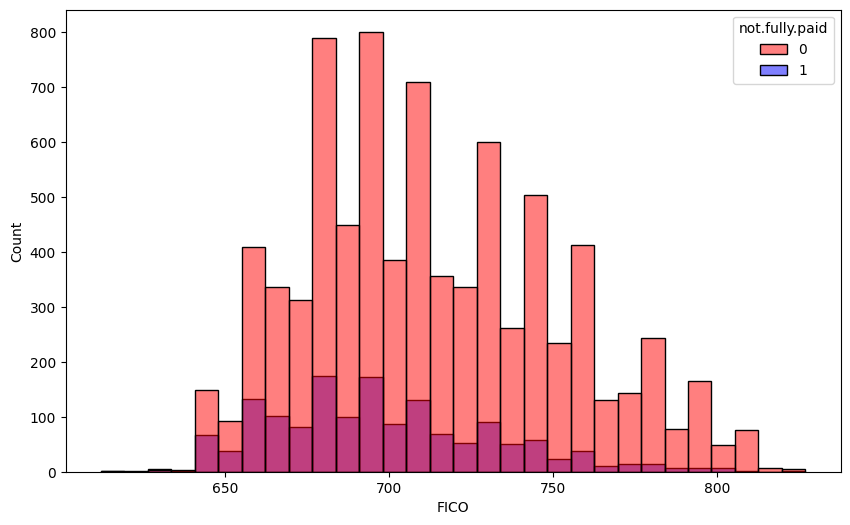

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=loans, x='fico', bins=30, hue='not.fully.paid',
             palette=['red','blue'], alpha=0.5)
plt.xlabel('FICO')


Here are the key takeaways for this chart:

1.  **Highly Imbalanced Data:** The overwhelming majority of individuals in the dataset **fully paid back their loans** (`not.fully.paid=0`, shown in red). The group that defaulted (`not.fully.paid=1`, blue) is very small in comparison.

2.  **Similar Distributions:** Both groups (those who paid and those who defaulted) have very similar FICO score distributions, with most people in the 650-750 range.

3.  **FICO is Not a Strong Separator:** Unlike the previous "Credit Policy" chart, a FICO score is **not a clear predictor** of whether someone will default. There are defaults (blue) even at high FICO scores and many full repayments (red) at low FICO scores.

**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

<Axes: xlabel='purpose', ylabel='count'>

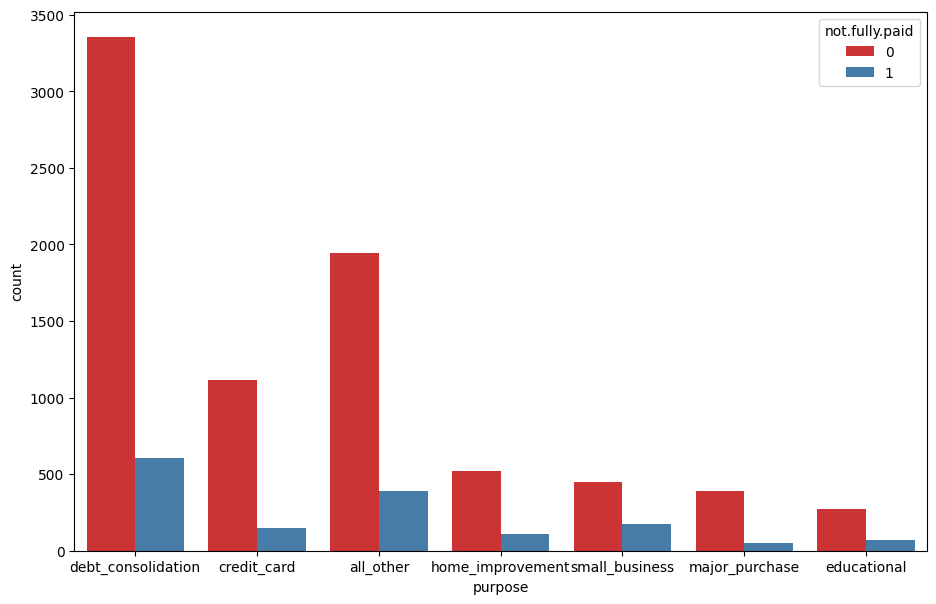

In [21]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

* **Most Common Loan Purpose:** `debt_consolidation` is by far the most common reason people take out loans, followed by `all_other` and `credit_card`.

* **Highest Default Risk:** **`small_business`** loans appear to have the highest default rate. Visually, the blue bar (`not.fully.paid=1`) is proportionally largest for this category compared to its red bar (`not.fully.paid=0`).

* **Lowest Default Risk:** `credit_card` and `major_purchase` loans seem to have the lowest default rates (the blue bars are proportionally smallest).

* **Overall Trend:** Across all categories, the vast majority of loans are fully paid back (the red bars are significantly taller than the blue bars).

**Let's see the trend between FICO score and interest rate.**

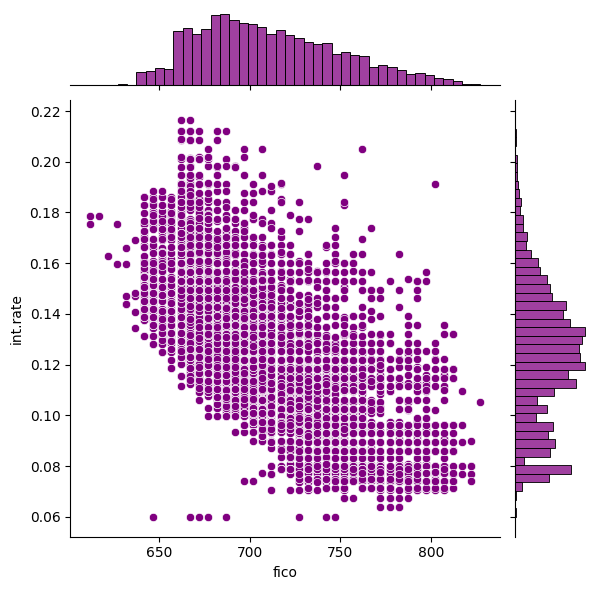

In [22]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

* **Higher FICO = Lower Interest Rate:** There is a strong, clear **negative correlation** between FICO scores and interest rates. As a person's FICO score goes up, the interest rate they are offered goes down.

* **Clear Risk-Based Pricing:** This chart clearly visualizes risk-based pricing.
    * **Low FICO scores** (e.g., below 700) are associated with a wide range of **higher interest rates** (roughly 12% to over 20%).
    * **High FICO scores** (e.g., above 750) are clustered almost exclusively at **lower interest rates** (mostly below 12%).

* **Distribution:** The histograms on the top and right show the data concentration. Most people in this dataset have FICO scores between **660 and 750**, and the most common interest rates fall into distinct "tiers" or bands (e.g., with peaks around 8%, 11%, and 13%).

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [24]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [25]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [26]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [32]:
predictions = dtree.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



---

### Key Metrics Explained

* **Class 0 (`not.fully.paid=0`):** The person **PAID** their loan (Majority Class).
* **Class 1 (`not.fully.paid=1`):** The person **DEFAULTED** (Minority Class). This is the one the bank *really* cares about predicting.

#### 1. For Class 1 (Defaulted) - The Bad News
This row shows the model's performance on the *critical* task of finding defaulters.

* **Precision (0.19):** **Very Poor.** When the model predicts someone *will default*, it is only correct **19%** of the time. The other 81% of the time, it's a "false alarm" (a false positive), flagging someone who would have paid.
* **Recall (0.24):** **Very Poor.** The model only finds **24%** of all the people who *actually defaulted*. It *misses* the other 76% (false negatives), incorrectly labeling them as "paid."
* **F1-Score (0.21):** This is the balanced average of precision and recall. It's extremely low, confirming the model has no practical value in finding defaulters.



#### 2. For Class 0 (Paid) - The Deceptive "Good" News
This row shows how the model did on the "easy" task of identifying people who paid.

* **Precision (0.85):** Good. When the model predicts someone *will pay*, it's correct 85% of the time.
* **Recall (0.82):** Good. The model correctly identifies 82% of all the people who *actually paid*.
* **F1-Score (0.84):** A strong, balanced score for this class.

**Why this is deceptive:** The model is good at this *only* because this class is the vast majority. It's the easy part of the problem.

---


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=600)

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [38]:
predictions = rfc.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



### 1. For Class 1 (Defaulted) 
This row shows the model's performance on the *critical* task of finding defaulters.

* **Recall (0.02):** **Catastrophic.** The model only found **2%** of the people who actually defaulted.
    * *The math:* Out of 443 defaulters, it correctly identified roughly **9** people. It missed the other **434**, mistakenly labeling them as "safe."
* **Precision (0.53):** **Mediocre.** On the very rare occasion the model *did* predict a default, it was correct about 53% of the time. This is higher than the Decision Tree, but irrelevant because the model takes this risk so rarely.
* **F1-Score (0.04):** This is effectively zero. It confirms the model has failed to learn the characteristics of a defaulter.

### 2. For Class 0 (Paid) 
This row shows how the model did on the "easy" task of identifying people who paid.

* **Precision (0.85):** Good. This matches the baseline percentage of payers in the dataset.
* **Recall (1.00):** **Suspiciously Perfect.** The model identified nearly 100% of the people who paid.
* **Why this is deceptive:** The model achieved this by predicting **"Paid" (Class 0) for almost everyone.** It didn't learn to distinguish between good and bad borrowers; it just learned that "betting on Class 0" is the safest way to get a high accuracy score.

---


**What performed better the random forest or the decision tree?**

In [40]:
# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.